<a href="https://colab.research.google.com/github/Jaomiew/Multivariate/blob/main/Multivariate_Exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ให้นักศึกษาทำข้อสอบใน Colab Notebook นี้โดยกรอกข้อมูลของตัวเองใน cell ที่ 2 แล้วรัน cell ที่ 1 - 5 และเริ่มทำข้อสอบใน cell ที่ 6 เป็นต้นไป

โดยโจทย์คือ
1. ข้อมูลโจทย์ อยู่ใน ตัวแปร ```Data```
2. ทำ clustering แล้วทำ visualize ข้อมูลแบบ 2 มิติ
3. ลด Dimension ของข้อมูลเหลือ 2 มิติ แล้วทำ clustering แล้ว visualize ข้อมูลแบบ 2 มิติ
4. เปรียบเทียบความแตกต่างของผลข้อ 2. กับ ข้อ 3.
5. เขียน comments อธิบายทุกขั้นตอน
6. อัด video อธิบาย code ทุกๆขั้นตอนรวมถึงผลแล้วอัพลง youtube ในรูปแบบ unlist 
7. commit โดยใช้ชื่อ commit เป็น link youtube ที่อธิบาย code ในข้อ 6.

กำหนดส่งวันที่ 2 พฤษภาคม 2564 (โดยให้มากรอกวันที่ commit ครั้งสุดท้ายใน sheet: https://docs.google.com/spreadsheets/d/1_qJwLDJVtOW1HxBcf_FHVc6UT4J_SOonuR6o3EEnVzw/edit?usp=sharing ช่อง Final)

In [1]:
from sklearn.datasets import make_blobs
import random,math
import numpy as np
import pandas

In [2]:
Name = 'วนิศรา จงใจ'
ID = '6230210548'

In [3]:
def DataGenerator(name,id):
    random.seed(int(id[3:6]))
    numfeat = random.randint(20,30)
    ct = random.randint(len(name)-6,len(name))
    
    X, y = make_blobs(n_samples=10000, centers=ct, n_features=numfeat , random_state=int(id[3:6]))

    print(f'{id[3:6]}:{numfeat}:{ct}')
    X_t = (X[:,1]*2)+int(id[3])
    X_t2 = (X[:,-1]*5)+int(id[4])

    DT = np.append(X,X_t.reshape([10000,1]),axis=1)
    DT = np.append(DT,X_t2.reshape([10000,1]),axis=1)
    
    return pandas.DataFrame(DT)

In [4]:
Data = DataGenerator(Name,ID)

021:22:8


In [5]:
Data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
0,6.485645,10.656856,1.079014,-4.494913,-6.411081,-1.885125,-7.477112,0.371177,-4.897252,-9.289070,-5.529589,-5.205340,4.608383,-4.927476,1.896545,-2.599315,-7.305203,-10.450609,-4.330282,-6.656340,-9.134927,6.291494,21.313712,33.457470
1,-4.289121,6.968292,7.882608,4.431154,0.693703,-5.681212,-4.296701,-3.065740,-3.961168,-0.983548,2.573198,-6.647040,5.926527,3.756572,7.916789,-5.889882,2.236790,3.598112,-2.070085,-1.960765,7.011266,4.779241,13.936584,25.896205
2,7.095764,6.285609,4.634458,-1.302512,6.999453,4.579689,-8.082380,2.312410,1.280952,-2.051580,-1.491575,-1.876514,-5.279607,6.300637,4.424806,-7.883949,4.398056,7.273171,3.705220,-4.228277,-2.366294,-5.292166,12.571219,-24.460828
3,8.385864,9.006438,3.447267,-6.806748,-6.302125,-1.713119,-7.443550,-2.719009,-5.339278,-6.477076,-6.479546,-3.088940,3.097534,-4.428617,0.631982,-4.049206,-8.848799,-7.195943,-2.975214,-6.329523,-7.323436,4.705528,18.012876,25.527640
4,-0.451989,-4.924983,6.075678,-3.611882,-8.216680,-4.347004,5.033887,-5.563423,-5.029373,8.211124,-0.528502,5.389470,8.402492,-5.395920,2.345136,-7.432053,8.780554,7.120948,2.276094,-5.290878,9.866202,-8.267920,-9.849965,-39.339598
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,-4.315489,5.555510,8.648606,5.238127,1.182735,-6.040623,-4.567277,-3.581809,-4.819656,-0.855485,0.074457,-4.045521,6.396997,3.648794,6.841691,-4.964565,1.301819,5.561758,-1.756138,-0.659482,7.760496,1.856285,11.111020,11.281423
9996,8.446535,9.427223,0.861386,-7.937334,-7.685445,-3.021410,-6.777158,-0.186860,-3.838284,-7.519526,-7.654209,-2.347574,4.472144,-3.793490,0.886924,-3.620560,-7.995977,-7.770960,-4.792198,-3.455671,-8.887046,5.200688,18.854446,28.003438
9997,9.735072,5.654188,5.533886,-1.587258,6.675141,6.090127,-9.770540,4.367936,1.485276,0.745904,-1.770936,-3.288347,-3.368496,5.038958,4.887708,-5.619200,4.379320,6.054204,6.029481,-6.044039,-1.765454,-3.885793,11.308375,-17.428965
9998,8.869819,0.509288,7.534608,7.393435,5.290501,7.180022,5.626367,0.224667,-4.340967,5.044768,-7.833117,-1.365183,-7.479037,-0.719758,8.590045,-3.947958,6.469329,5.328979,2.647874,-4.527379,6.426756,-0.274819,1.018577,0.625905



### **ดูขนาดของข้อมูลที่กำหนดมาให้**

In [6]:
Data.shape

(10000, 24)

In [7]:
corr = np.corrcoef(Data.to_numpy().T)
corr.shape

(24, 24)

In [8]:
for i in range(corr.shape[0]):
    for j in range(corr.shape[1]):
        if (i !=j) and (corr[i,j] == 1.):
            print(f'row = {i} column = {j} corrcoef = {corr[i,j]}')

### **ทำการ clustering data แล้วทำ visualize ให้ข้อมูลออกมาในรูปแบบ 2 มิติ**

In [9]:
#Import ทำการ import function ที่ต้องการใช้ในการทำ K-mean จาก sklearn.cluster
from sklearn.cluster import KMeans

In [10]:
#Defind ทำการกำหนดค่า k ที่เราต้อวงการ 
kmeans = KMeans(n_clusters=3,random_state=2021)
#กำหนดค่า k ที่ต้องการ
#random_state=2555

In [11]:
kmeans.fit(Data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=2021, tol=0.0001, verbose=0)

In [12]:
#แสดงจุดที่คำนวณได้
kmeans.cluster_centers_

array([[ -0.33508153,   2.70164967,   5.54541148,  -2.02130735,
         -4.80934426,  -6.19061172,  -2.39030779,  -0.83502062,
         -3.64682243,  -3.90470501,  -2.9417217 ,   0.96629368,
          2.35683988,  -2.89116318,   3.5572853 ,  -1.70098493,
         -0.76837169,   0.51573336,  -0.17088484,  -2.44195096,
         -0.99295431,   3.20053667,   5.40329934,  18.00268336],
       [ -0.0933558 ,  -4.52543173,   6.22126125,  -3.22591725,
         -6.07736611,  -3.1989375 ,   3.46845963,  -4.38608059,
         -4.68621962,   7.61219664,   0.796733  ,   4.88407969,
          7.95767759,  -4.49164157,   0.63735995,  -7.36873602,
          9.22272073,   6.2354804 ,   3.06941613,  -5.92908447,
          9.38643452,  -9.26219338,  -9.05086345, -44.3109669 ],
       [  8.6219031 ,   0.47078531,   1.67499266,   4.25098216,
          3.11962362,   4.94308934,   0.97879367,  -2.02881901,
          1.00449928,  -1.33084317,  -2.6033081 ,  -1.74229954,
         -1.67349804,   4.01857702,   

In [13]:
#ทดสอบการจัดกลุ่มของ Data
y = kmeans.predict(Data)
y

array([0, 0, 2, ..., 2, 2, 0], dtype=int32)

# **ทำ PCA ลด Dimention**

In [14]:
from sklearn.decomposition import PCA

In [15]:
pca = PCA(n_components=2)

In [16]:
new_pca = pca.fit_transform(Data)

In [17]:
import matplotlib

In [18]:
matplotlib.rcParams['figure.figsize']=[15,20]

In [19]:
from matplotlib import pyplot as plt

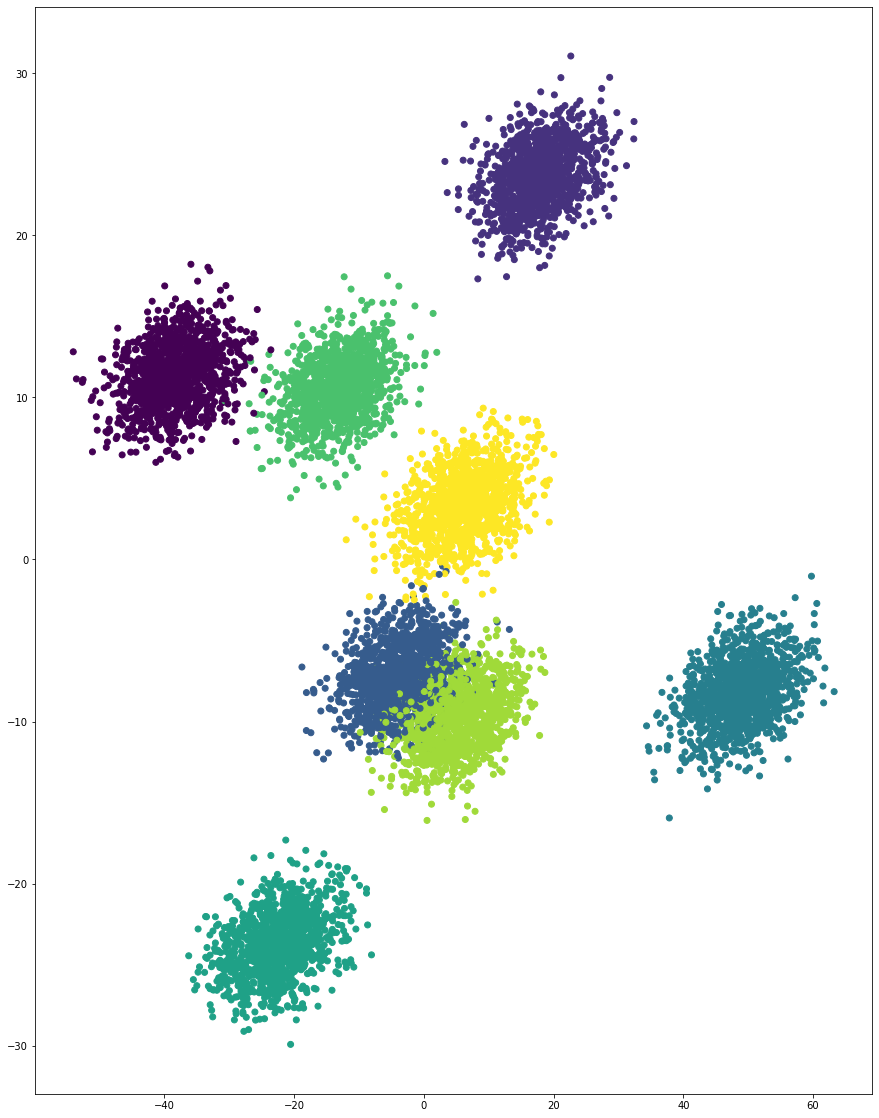

In [20]:
kmeans = KMeans(random_state=2021)
kmeans.fit(Data)
y = kmeans.predict(Data)
plt.scatter(new_pca[:,0],new_pca[:,1],c=y)

### ทำการหาจำนวนกลุ่มที่เหมาะสมต่อการแบ่งกลุ่ม หรือทำการหาค่า k ที่เหมาะสมของ data


### **ใช้วิธีการหาค่า k ด้วยวิธี " The elbow method "**

In [21]:
#เริ่มแรกทำการคำนวนค่า SSE ของ data
kmeans.inertia_ ##ค่าของ SSE Sum of Squared error

505051.96790109895

In [22]:
SSE = list()
for k in [1,2,3,4,5,6,7,8]:
    kmeans = KMeans(n_clusters = k , random_state = 2021)
    XX = kmeans.fit(Data)
    SSE.append(kmeans.inertia_)

In [23]:
SSE

[12461826.110306859,
 8257488.36431596,
 6068924.934592735,
 4437584.239218885,
 2939103.304398188,
 1913915.3260627855,
 1172674.6511451437,
 505051.96790109895]

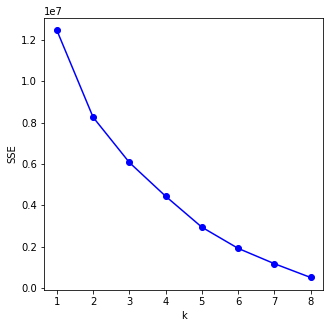

In [24]:
#ทำการนำค่า SSE ที่ได้มา plot กราฟเพื่อดูว่ามีกี่ k กลุ่ม
matplotlib.rcParams['figure.figsize']=[5,5]
plt.plot([1,2,3,4,5,6,7,8],SSE,'o-b')
plt.xlabel('k')
plt.ylabel('SSE');

จากกราฟจะบอกได้ว่า k มีทั้งหมด 4 กลุ่ม ดูจากจุดที่ k ที่ 4 เริ่มมีความแตกต่างของระยะห่างระหว่างจุดที่ใกล้กัน


### **ใช้วิธีการหาค่า k ด้วยวิธี " The silhouette coefficient "**

In [25]:
#import function metrics มาใช้
from sklearn import metrics

In [26]:
SilH = list()
for k in [2,3,4,5,6,7,8]:
    kmeans = KMeans(n_clusters = k , random_state = 2021)
    kmeans.fit(Data)
    score = metrics.silhouette_score(Data,kmeans.labels_)
    SilH.append(score)

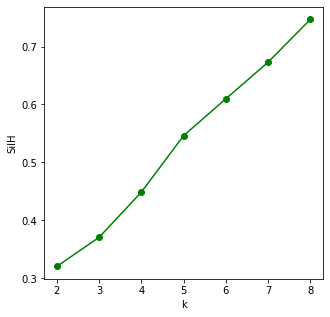

In [27]:
matplotlib.rcParams['figure.figsize']=[5,5]
plt.plot([2,3,4,5,6,7,8],SilH,'o-g')
plt.xlabel('k')
plt.ylabel('SilH');


จากกราฟจะบอกได้ว่า k มีทั้งหมด 3 กลุ่ม ดูค่าได้โดยมีจุดที่มีระยะห่างแตกต่างกันใน 3 ช่วงที่ k เท่ากับ 2 , 3 และ 5

จากการดูกราฟ The elbow method และ The silhouette coefficient เพื่อหาค่า k ที่เหมาะสม พบว่าได้ค่า k ที่เหมาะสมคือ k = 5 จึงเลือกใช้ k = 5 ในการจัดกลุ่มของ Data ชุดนี้

# **2. ทำการ clustering data แล้วทำ visualize ให้ข้อมูลออกมาในรูปแบบ 2 มิติ**

In [29]:
#Import ทำการ import function ที่ต้องการใช้ในการทำ K-mean จาก sklearn.cluster
from sklearn.cluster import KMeans

In [31]:
#Defind ทำการกำหนดค่า k ที่เราต้อวงการ 
kmeans = KMeans(n_clusters= 5,random_state=2021)
#กำหนดค่า k ที่ต้องการ (ไม่จำเป็นต้องกำหนดก็ได้ เพราะkmeanมีdefult)
#random_state=2021 ให้ทุกคนเริ่มสุ่มที่จุดเดียวกัน จะได้มีการจัดกลุ่มเหมือนกัน

In [32]:
kmeans.fit(Data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=2021, tol=0.0001, verbose=0)

In [33]:
#แสดงจุดที่คำนวณได้
kmeans.cluster_centers_

array([[ -0.0933558 ,  -4.52543173,   6.22126125,  -3.22591725,
         -6.07736611,  -3.1989375 ,   3.46845963,  -4.38608059,
         -4.68621962,   7.61219664,   0.796733  ,   4.88407969,
          7.95767759,  -4.49164157,   0.63735995,  -7.36873602,
          9.22272073,   6.2354804 ,   3.06941613,  -5.92908447,
          9.38643452,  -9.26219338,  -9.05086345, -44.3109669 ],
       [  6.71929757,  -2.9685926 ,   0.71123385,   5.17912498,
         -5.30465187,  -1.46406568,   7.68484178,  -5.62322949,
          1.62408466,  -9.22437334,   1.38545621,   2.45904437,
          5.88281942,  -0.22370144,  -0.98055528,  -7.50917998,
         -0.21595077,   0.9465387 ,  -2.77927024,   1.26507957,
         -3.20254591,  -0.16489693,  -5.9371852 ,   1.17551533],
       [  1.69337795,   7.74385097,   5.29609418,  -1.02576601,
         -3.4423718 ,  -4.6697479 ,  -5.87270983,  -2.05143867,
         -4.11183264,  -4.30756448,  -2.65005416,  -4.57721704,
          4.63372983,   0.38183272,   

In [34]:
#ทดสอบการจัดกลุ่มของ Data
y = kmeans.predict(Data) #กำหนดให้ข้อมูลที่ทำการจัดกลุ่มเป็น y 
y

array([2, 2, 3, ..., 3, 3, 2], dtype=int32)

# **ทำ PCA ลด Dimention**

In [35]:
pca = PCA(n_components=2)


In [36]:
new_pca = pca.fit_transform(Data)

In [37]:
import matplotlib

In [38]:
matplotlib.rcParams['figure.figsize']=[15,20] #ทำการเพิ่มขนาดของกราฟ เพื่อให้ดูการกระจายของข้อมูลได้ง่ายขึ้นและดูข้อมุลที่ซ้อนทับกันได้ง่ายขึ้น

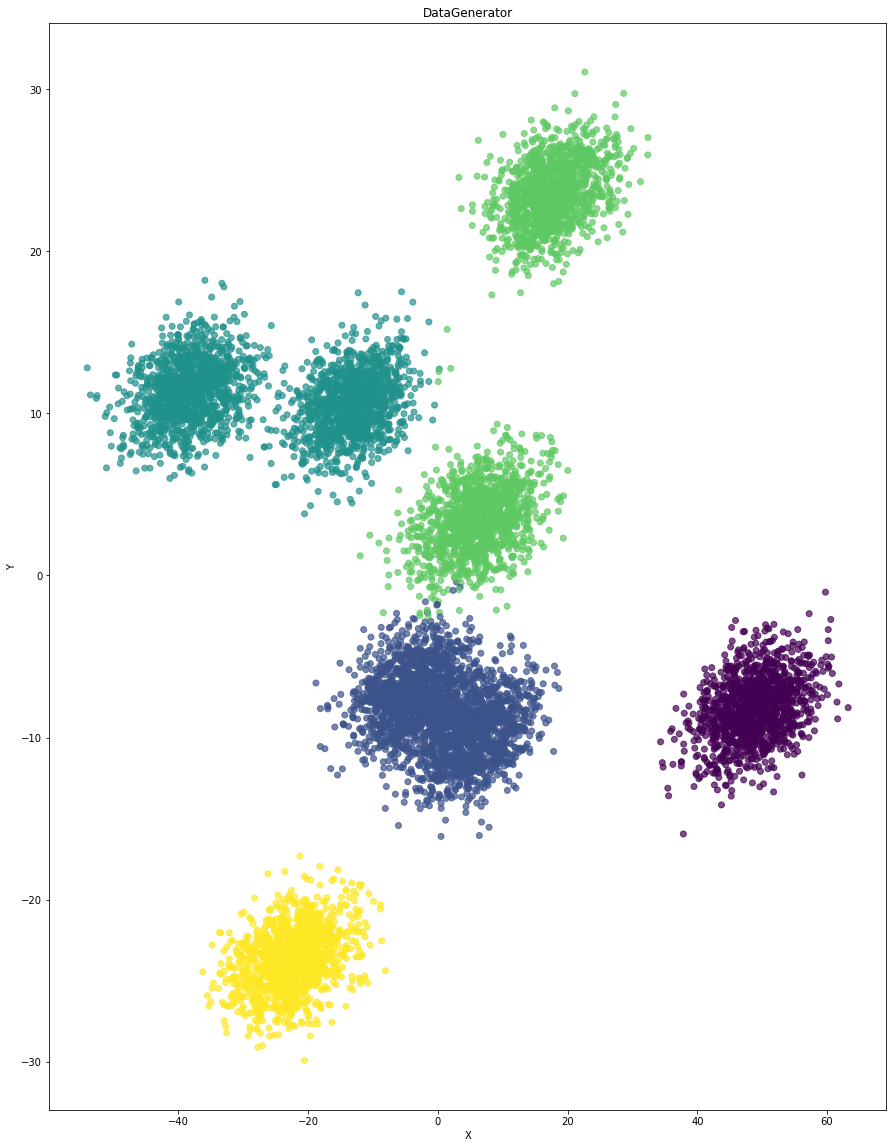

In [39]:
plt.scatter(new_pca[:,0],new_pca[:,1],c=y,alpha=0.7) 
plt.title('DataGenerator') 
plt.xlabel('X') 
plt.ylabel('Y');


จากกราฟที่ได้ พบว่าเมื่อแบ่งกลุ่มของ Data เป็น 5 กลุ่ม จะได้กลุ่มของข้อมูลดังนี้

# **3. ลด Dimension ของข้อมูลเหลือ 2 มิติ แล้วทำ clustering แล้ว visualize ข้อมูลแบบ 2 มิติ**

# **ทำ MDS ลด Dimention**

In [4]:
from sklearn.manifold import MDS

In [2]:
mds = MDS(n_components=2) #กำหนดว่าเราจะใช้ components ของ mds เป็น 2

In [3]:
new_mds = mds.fit_transform(Data) #ทำการคำนวณข้อมูล คำนวณระยะห่างระหว่างจุด

NameError: ignored

# **ทำ K-mean**

In [5]:
kmeans2 = KMeans(n_clusters=5,random_state=2021) #กำหนดกลุ่ม k = 4 ตามการหาค่า k ที่เหมาะสมข้างต้น 
kmeans2.fit(Data) 
g = kmeans2.predict(Data) #กำหนดให้ข้อมูลที่ทำการจัดกลุ่มเป็น g

NameError: ignored

In [ ]:
plt.scatter(new_mds[:,0],new_mds[:,1],c=g,alpha=0.7)
plt.title('DataGenerator') 
plt.xlabel('X') 
plt.ylabel('Y');

# **4. เปรียบเทียบความแตกต่างของผลข้อ 2. กับ ข้อ 3.**

### **กราฟจากข้อ 2**

In [ ]:
plt.scatter(new_pca[:,0],new_pca[:,1],c=y,alpha=0.7)
plt.title('DataGenerator') 
plt.xlabel('X') 
plt.ylabel('Y');

### **กราฟจากข้อ 3**

In [ ]:
plt.scatter(new_mds[:,0],new_mds[:,1],c=g,alpha=0.7)
plt.title('DataGenerator') 
plt.xlabel('X') 
plt.ylabel('Y');